In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Constants

teams = [
    'Arizona Cardinals',
    'Atlanta Falcons',
    'Baltimore Ravens',
    'Buffalo Bills',
    'Carolina Panthers',
    'Chicago Bears',
    'Cincinnati Bengals',
    'Cleveland Browns',
    'Dallas Cowboys',
    'Denver Broncos',
    'Detroit Lions',
    'Green Bay Packers',
    'Houston Texans',
    'Indianapolis Colts',
    'Jacksonville Jaguars',
    'Kansas City Chiefs',
    'Las Vegas Raiders',
    'Los Angeles Chargers',
    'Los Angeles Rams',
    'Miami Dolphins',
    'Minnesota Vikings',
    'New England Patriots',
    'New Orleans Saints',
    'New York Giants',
    'New York Jets',
    'Philadelphia Eagles',
    'Pittsburgh Steelers',
    'San Francisco 49ers',
    'Seattle Seahawks',
    'Tampa Bay Buccaneers',
    'Tennessee Titans',
    'Washington Commanders'
]

train_years = [2015, 2016, 2017, 2018, 2019, 2020]
test_years = [2021, 2022]



In [41]:
# Gather Data

X_train = pd.read_csv('/content/drive/Shared drives/M148Project/CSVs/new_train_data_with_avgs.csv')
X_test = pd.read_csv('/content/drive/Shared drives/M148Project/CSVs/new_test_data_with_avgs.csv')

data = [X_train, X_test]
team_data = pd.concat(data)

# Preprocess the data
team_data = team_data.drop(['Team', 'Year', 'Win_Percentage', 'Total_Rest_Days'], axis = 1)

# print(team_data)

In [63]:
# Apply one-hot encoding to the categorical feature
team_data_encoded = pd.get_dummies(team_data, columns=['Playoff'], prefix='Playoff')
print(team_data_encoded)


    Total_Distance_Traveled  Total_Points_For  Total_Points_Allowed  \
0              11709.954940               489                   313   
1              10602.459040               418                   362   
2              10284.258790               295                   361   
3               7852.459252               225                   425   
4              10868.190350               361                   442   
..                      ...               ...                   ...   
59              8281.733607               313                   358   
60              7268.025122               419                   354   
61              6109.496629               298                   359   
62              6840.027714               319                   414   
63              6550.151980               293                   321   

    Total_Yards  Rush_Yards  Pass_Yards  Total_Opp_Yards  Opp_Rush_Yards  \
0          6533        1917        4616             5147            146

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


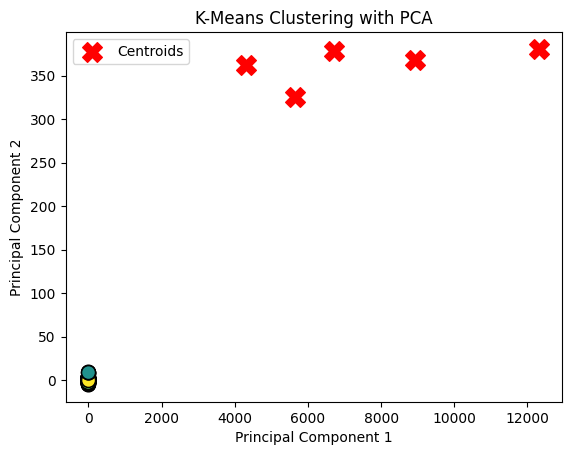

In [64]:
# K-Model Clustering

# Standardize numerical features
scaler = StandardScaler()
X_standardized = scaler.fit_transform(team_data_encoded)

k = 5

kmeans = KMeans(n_clusters=k, random_state=42)

kmeans.fit(team_data_encoded)

labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_standardized)

team_data_encoded['Cluster'] = labels

# Plot the clustered data in the reduced space
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=team_data_encoded['Cluster'], cmap='viridis', edgecolors='k', s=100)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering with PCA')
plt.legend()
plt.show()


#print(team_data_encoded)